In [2]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from dataloader.dataloader import DataLoader
from preprocessing.clustering_segmentation import ClusteringSegmentation
from preprocessing.edge_detection import EdgeDetection
from preprocessing.image_restoration import ImageRestorer
from preprocessing.preproccessing import ImagePreprocessor
from preprocessing.region_segmentation import RegionBasedSegmentation
from preprocessing.threshold_segmentation import ThresholdSegmentation
from feature_extraction.feature_extraction import FeatureExtractor
from feature_selection.feature_selection import FeatureSelector
from model_selection.model_selection import ModelSelection
from performance_analysis.performance_analysis import PerformanceAnalysis
from illumination_preprocessing.illumination_preprocessing import IlluminationPreprocessing

import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Loading

In [3]:
dataloader = DataLoader(Path('./data'))

In [4]:
# Load Data from files
x_train, y_train, x_test, y_test, x_val, y_val = dataloader.load_data()

  0%|          | 0/2 [00:00<?, ?it/s]

Image data\men\2\2_men (107).JPG is corrupted
Image data\men\2\2_men (108).JPG is corrupted
Image data\men\3\3_men (140).JPG is corrupted
Image data\men\3\3_men (141).JPG is corrupted
Image data\men\4\4_men (5).JPG is corrupted
Image data\men\4\4_men (6).JPG is corrupted


100%|██████████| 2/2 [04:18<00:00, 129.30s/it]


In [5]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (1745, 320, 320, 3)
y_train shape: (1745, 1)
x_test shape: (188, 320, 320, 3)
y_test shape: (188,)
x_val shape: (188, 320, 320, 3)
y_val shape: (188,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x_train[0] shape: (320, 320, 3)
x_train[0]  [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
x_train[0]  [ 24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64

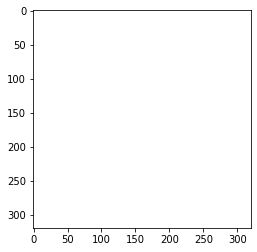

In [17]:
import matplotlib.pyplot as plt
print(f"x_train[0] shape: {x_train[0].shape}")
print(f"x_train[0]  {x_train[600]}")
print(f"x_train[0]  {np.unique(x_train[600])}")
plt.imshow(x_train[700])
plt.show()

## Preprocessing

In [18]:
illumination_processing = IlluminationPreprocessing()
illuminated_list = illumination_processing.process_images_loops(x_train)
illuminated_train = [t[0] for t in illuminated_list]
illuminated_train_mask = [t[1] for t in illuminated_list]

illuminated_list_val = illumination_processing.process_images_loops(x_val)
illuminated_val = [t[0] for t in illuminated_list_val]
illuminated_val_mask = [t[1] for t in illuminated_list_val]

illuminated_train shape: (1745, 320, 320)
illuminated_train_mask shape: (1745, 320, 320)
illuminated_val shape: (188, 320, 320)
illuminated_val_mask shape: (188, 320, 320)


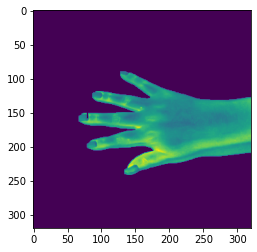

In [24]:
illuminated_train = np.array(illuminated_train)
illuminated_train_mask = np.array(illuminated_train_mask)
illuminated_val = np.array(illuminated_val)
illuminated_val_mask = np.array(illuminated_val_mask)
print(f"illuminated_train shape: {illuminated_train.shape}")
print(f"illuminated_train_mask shape: {illuminated_train_mask.shape}")
print(f"illuminated_val shape: {illuminated_val.shape}")
print(f"illuminated_val_mask shape: {illuminated_val_mask.shape}")
plt.imshow(illuminated_val[180])
plt.show()

In [ ]:
clustering_segmentation = ClusteringSegmentation(method='kmeans', n_clusters=3, compactness=30.0, sigma=1.0)
plt.imshow(clustering_segmentation.process(x_train[0]))
plt.show()

In [ ]:
edge_detection = EdgeDetection(method='canny')
#method: for roberts and canny: image must be 2D
plt.imshow(edge_detection.process(x_train[70]))
plt.show()

In [ ]:
edge_detection = EdgeDetection(method='canny')
edge_detected_images = edge_detection.process(x_train)
edge_detected_images_val = edge_detection.process(x_val)

In [ ]:
plt.imshow(edge_detected_images[400])
plt.show()

In [ ]:
image_restorer = ImageRestorer(method='median')
#'mean_rectangular', 'gaussian', 'adaptive' and 'wiener' generate an error
plt.imshow(image_restorer.process(x_train[0]))
plt.show()

In [ ]:
image_preprocessor = ImagePreprocessor(method = 'CLAHE')
# method = 'log' generates an error
plt.imshow(image_preprocessor.process(x_train[0]))
plt.show()

In [ ]:
region_based_segmentation = RegionBasedSegmentation(method='region_merging')
# method: 'region_splitting' generates an error
plt.imshow(region_based_segmentation.process(x_train[0]))
plt.show()

## Features Extraction

In [ ]:
# feature_extractor = FeatureExtractor()

# # HOG FEATURES
# hog_features = feature_extractor.extract_hog_features(rgb2gray(x_train[:10]))
# print(f"hog_features shape: {hog_features.shape}")
# print(f"hog_features: {hog_features}")
# print(np.unique(hog_features))
# print(np.max(hog_features))

# # LCP FEATURES
# lbp_features = []
# for i in range(10):
#     lbp_features.append(feature_extractor.extract_lbp_features(rgb2gray(x_train[i])))
# lbp_features = np.array(lbp_features)
# print(f"lbp_features shape: {lbp_features.shape}")


# sift_features = feature_extractor.extract_sift_features(x_train[:5])
# sift_features = np.array(sift_features)
# print(f"sift_features shape: {sift_features.shape}")



# daisy_features = feature_extractor.extract_daisy_features(rgb2gray(x_train[:25]))
# print(f"daisy_features shape: {daisy_features.shape}")


# FOURIER DESCRIPTOR FEATURES (error)
# fourier_descriptor_features = []
# for i in range(10):
#     fourier_descriptor_features.append(feature_extractor.extract_fourier_descriptor_features(X_train[i]))
# fourier_descriptor_features = np.array(fourier_descriptor_features)
# print(f"fourier_descriptor_features shape: {fourier_descriptor_features.shape}")

# SURF FEATURES (error)

# surf_features = feature_extractor.extract_surf_features(x_train[0:10])
# print(f"surf_features shape: {surf_features.shape}")


# ORB FEATURES

# orb_features = feature_extractor.extract_orb_features(x_train[:10])
# print(f"orb_features shape: {orb_features.shape}")

In [25]:
feature_extractor = FeatureExtractor()
# extracted_features, max_length = feature_extractor.extract_hog_features(illuminated_train_mask) max_length_train=0, test = False)
# extracted_features_val,_ = feature_extractor.extract_hog_features(illuminated_val_mask, max_length_train=max_length, test = True)
extracted_features = feature_extractor.extract_hog_features(illuminated_train_mask)
extracted_features_val = feature_extractor.extract_hog_features(illuminated_val_mask)

In [26]:
print(f"extracted_features shape: {extracted_features.shape}")
print(f"extracted_features_val shape: {extracted_features_val.shape}")

extracted_features shape: (1745, 48672)
extracted_features_val shape: (188, 48672)


In [ ]:
print(illuminated_train.reshape(illuminated_train.shape[0],-1).shape)

## Feature Selection

In [27]:
feature_selector = FeatureSelector()

# PCA FEATURES

pca_features = feature_selector.extract_pca_features(extracted_features, load=False, num_pca_components=0.85)
pca_features_val = feature_selector.extract_pca_features(extracted_features_val, load=True, num_pca_components=0.85)

print(f"pca_features shape: {pca_features.shape}")
print(f"pca_features_val shape: {pca_features_val.shape}")

Creating new PCA model...
pca_features shape: (1745, 605)
pca_features_val shape: (188, 605)


## Model Selection

In [ ]:
# # true_labels is just for trial here
# true_labels = np.concatenate((np.zeros(10), np.ones(10) * 3))
# model_selection = ModelSelection(
#     hog_features[:15], true_labels[:15], hog_features[15:], true_labels[15:]
# )
# knn, pred_train, pred_val = model_selection.KNN()
# print(pred_train)


In [48]:
model_selection = ModelSelection(pca_features, y_train, pca_features_val, y_val)

svm, pred_train, pred_val = model_selection.SVM()
performance_analysis = PerformanceAnalysis('SVM Train', pred_train, y_train)
performance_analysis.calculate_performance_metrics()
performance_analysis = PerformanceAnalysis('SVM Val', pred_val, y_val)
performance_analysis.calculate_performance_metrics()


knn, pred_train, pred_val = model_selection.KNN()
performance_analysis = PerformanceAnalysis('KNN Train', pred_train, y_train)
performance_analysis.calculate_performance_metrics()
performance_analysis = PerformanceAnalysis('KNN Val', pred_val, y_val)
performance_analysis.calculate_performance_metrics()

ensemble, pred_train, pred_val = model_selection.Ensemble()
performance_analysis = PerformanceAnalysis('Ensemble Train', pred_train, y_train)
performance_analysis.calculate_performance_metrics()
performance_analysis = PerformanceAnalysis('Ensemble Val', pred_val, y_val)
performance_analysis.calculate_performance_metrics()


adaboost, pred_train, pred_val = model_selection.AdaBoost()
performance_analysis = PerformanceAnalysis('AdaBoost Train', pred_train, y_train)
performance_analysis.calculate_performance_metrics()
performance_analysis = PerformanceAnalysis('AdaBoost Val', pred_val, y_val)
performance_analysis.calculate_performance_metrics()

c:\Users\EGYPT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM Train
Accuracy: 99.83%

Model: SVM Val
Accuracy: 51.6%



c:\Users\EGYPT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: KNN Train
Accuracy: 52.84%

Model: KNN Val
Accuracy: 25.53%



d:\Senior II\Pattern Recognition\Project\Project-Pattern-Recognition\model_selection\model_selection.py:139: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(self.x_train, self.y_train)


Model: Ensemble Train
Accuracy: 99.94%

Model: Ensemble Val
Accuracy: 45.21%



c:\Users\EGYPT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoost Train
Accuracy: 45.39%

Model: AdaBoost Val
Accuracy: 40.96%



In [49]:
ann, pred_train, pred_val = model_selection.ANN(input_dim=pca_features.shape[1], 
                                                output_dim=6)
performance_analysis = PerformanceAnalysis('ANN Train', pred_train, y_train)
performance_analysis.calculate_performance_metrics()
performance_analysis = PerformanceAnalysis('ANN Val', pred_val, y_val)
performance_analysis.calculate_performance_metrics()

input_dim: 605
output_dim: 6
x_train: (1745, 605)
y_train: (1745, 1)
y_onehot: (1745, 6)
Epoch 1/10
55/55 [==============================] - 1s 10ms/step - loss: 5.1473 - accuracy: 0.4287 - val_loss: 3.4320 - val_accuracy: 0.6117
Epoch 2/10
55/55 [==============================] - 0s 9ms/step - loss: 2.2941 - accuracy: 0.8401 - val_loss: 2.2552 - val_accuracy: 0.6117
Epoch 3/10
55/55 [==============================] - 1s 10ms/step - loss: 1.2324 - accuracy: 0.9421 - val_loss: 1.8813 - val_accuracy: 0.5904
Epoch 4/10
55/55 [==============================] - 1s 11ms/step - loss: 0.7787 - accuracy: 0.9691 - val_loss: 1.7033 - val_accuracy: 0.6011
Epoch 5/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6000 - accuracy: 0.9650 - val_loss: 1.7269 - val_accuracy: 0.6011
Epoch 6/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6223 - accuracy: 0.9467 - val_loss: 2.1028 - val_accuracy: 0.5691
Epoch 7/10
55/55 [==============================] - 0s 8ms/step - lo